In [1]:
import pandas as pd
import pymysql 
import pandas 
from haversine import haversine
import datetime as dt

In [2]:
#yolo-face_label불러오기
import os 
import shutil
file = open('./../datasets/211221_114331_114442_33-Copy1.txt', "r")
img_list33=[]
x_list33=[]
while True:
    line = file.readline()
    img_list33.append(line.split('.jpg')[0].split('/')[-1])
    x_list33.append(line.split('.jpg')[-1].split(',')[2:6])
    if not line:
        break

In [3]:
file = open('./../datasets/211221_114331_114442_34-Copy1.txt', "r")
img_list34=[]
x_list34=[]
while True:
    line = file.readline()
    img_list34.append(line.split('.jpg')[0].split('/')[-1])
    x_list34.append(line.split('.jpg')[-1].split(',')[2:6])
    if not line:
        break

In [4]:
#33와34의 공통된 이미지 찾기
img_list=[]
for i in img_list34:
    ii = i.split('_') 
    print(ii)
    if ii ==['', '', ''] or ii ==[''] :
        break
    iii = ii[0]+'_'+ii[1]+'_'+ii[2]+'_'+'33'+'_'+ii[-1]
    if iii in img_list33:
        #print(iii)
        img_list.append(iii)

['211221', '114331', '114442', '34', '008']
['211221', '114331', '114442', '34', '009']
['211221', '114331', '114442', '34', '010']
['211221', '114331', '114442', '34', '011']
['211221', '114331', '114442', '34', '012']
['211221', '114331', '114442', '34', '013']
['211221', '114331', '114442', '34', '014']
['211221', '114331', '114442', '34', '015']
['211221', '114331', '114442', '34', '016']
['211221', '114331', '114442', '34', '017']
['211221', '114331', '114442', '34', '018']
['211221', '114331', '114442', '34', '019']
['211221', '114331', '114442', '34', '020']
['211221', '114331', '114442', '34', '021']
['211221', '114331', '114442', '34', '022']
['211221', '114331', '114442', '34', '023']
['211221', '114331', '114442', '34', '024']
['211221', '114331', '114442', '34', '025']
['211221', '114331', '114442', '34', '026']
['211221', '114331', '114442', '34', '027']
['211221', '114331', '114442', '34', '028']
['211221', '114331', '114442', '34', '029']
['211221', '114331', '114442', '

In [5]:
#교집합의 이미지 번호 추출
img_number =[] 
for i in img_list:
    #print(i.split('_')[-1])
    img_number.append(i.split('_')[-1])
    

In [6]:
len(img_number)

37

In [9]:

# 시간대 추출
time_list =[]
time = 114331 #-1할것 #시작 시간 

for i in range(0,70): #파일개수 

    temp_time = str(time)
    hour, min, sec = temp_time[0:2], temp_time[2:4], temp_time[4:]
    a = str((dt.datetime(2022,10,10,int(hour),int(min),int(sec)) + dt.timedelta(seconds=1)).time())
    #print(a)


    a = a.split(':')
    result1 = "".join(a)
    
    time_list.append(result1)
    time = result1

In [10]:
ans_list=[]
for i in img_number:
    #print(int(i))
    print(time_list[int(i)])
    ans_list.append(time_list[int(i)])

114340
114341
114342
114343
114344
114345
114346
114347
114348
114349
114350
114351
114352
114353
114354
114355
114356
114357
114358
114359
114400
114401
114402
114403
114404
114405
114406
114407
114408
114409
114410
114411
114412
114413
114414
114415
114416


In [11]:
df = pd.read_excel('./../datasets/ADS-B/211221_114331_114442_second.xlsx',engine='openpyxl' )
# 루다시스에서 제공한 우측 카메라 위치 정보 
right_camera = (36.5944523040, 126.2943242956) 

GT=[]
time_=[]
temp =0
num_=[]
result_list=[]
distance_list =[]
for j in range(0,len(df['InsertDateTime'])):
    for h in range(0,len(ans_list)):

        if temp == df['InsertDateTime'][j].split(' ')[-1].split('.')[0]:
            continue
        if int(df['InsertDateTime'][j].split(' ')[-1].split('.')[0]) == int(ans_list[h]) :
            print(df['InsertDateTime'][j].split(' ')[-1].split('.')[0])
            temp = df['InsertDateTime'][j].split(' ')[-1].split('.')[0]
            airplane = (df[' Lat'][j],df[' Lng'][j])
            result = haversine(right_camera, airplane, unit='m') 
            result_list.append(result)
        
            Alti_mi = df[' Alti'][j] *0.3048
            distance_ = result*result + Alti_mi*Alti_mi
            distance = distance_**0.5

            time_.append(df['InsertDateTime'][j].split(' ')[-1].split('.')[0])
            GT.append(distance)
            print(distance)
            num_.append(h)
            print('ooooooo')

114340
2007.6811835185647
ooooooo
114341
1977.0417229437128
ooooooo
114342
1933.6370275515476
ooooooo
114343
1917.372361401382
ooooooo
114344
1901.0474538950216
ooooooo
114345
1899.2146760359917
ooooooo
114346
1897.3827344146032
ooooooo
114347
1891.9616504008425
ooooooo
114348
1761.794806320382
ooooooo
114349
1761.794806320382
ooooooo
114350
1719.0272297521797
ooooooo
114351
1719.0272297521797
ooooooo
114352
1659.4216051893545
ooooooo
114353
1639.7563781588283
ooooooo
114354
1636.1200766833158
ooooooo
114355
1634.3034312360346
ooooooo
114356
1628.9725776546154
ooooooo
114357
1572.8586417996187
ooooooo
114358
1473.5741802302518
ooooooo
114359
1461.7442970399438
ooooooo
114400
1414.0438141424695
ooooooo
114401
1401.7623395662263
ooooooo
114402
1384.6738892370008
ooooooo
114403
1384.6738892370008
ooooooo
114404
1384.6738892370008
ooooooo
114405
1276.8697389734452
ooooooo
114406
1259.0035655556599
ooooooo
114407
1204.9580276067406
ooooooo
114408
1168.3196642193034
ooooooo
114409
1154.87862

In [12]:
time_[5:]

['114345',
 '114346',
 '114347',
 '114348',
 '114349',
 '114350',
 '114351',
 '114352',
 '114353',
 '114354',
 '114355',
 '114356',
 '114357',
 '114358',
 '114359',
 '114400',
 '114401',
 '114402',
 '114403',
 '114404',
 '114405',
 '114406',
 '114407',
 '114408',
 '114409',
 '114410',
 '114411',
 '114412',
 '114413',
 '114414',
 '114415',
 '114416']

In [13]:
air_plane=[]
disparity_list=[]
j=0
for i in num_:

    print('--')
    #감지된 좌표에서 중앙값 찾기
    #print(right.pandas().xyxy[0])
    print(i)
    leftPoint = [(int(x_list33[i][2]) + int(x_list33[i][0]))/2, (int(x_list33[i][1]) + int(x_list33[i][3]))/2] 
    rightPoint = [(int(x_list34[i][2]) + int(x_list34[i][0]))/2, (int(x_list34[i][1]) + int(x_list34[i][3]))/2]

    left_width = (int(x_list33[i][3] )- int(x_list33[i][1])) # bb크기 = 비행기 크기
    right_width = (int(x_list34[i][3])- int(x_list34[i][1])) # bb크기 = 비행기 크기
    print('left_width',left_width)
    print('right_width',right_width)
    
    
    avg_ans = int((left_width+right_width)/2)
    #피라고라스 정리 a^2+b^2=c^2 x좌표 차이, y좌표차이 
    xSub = (leftPoint[0] - rightPoint[0])
    ySub = (leftPoint[1] - rightPoint[1]) 

    disparity = (xSub*xSub)+(ySub*ySub) #c^2
    disparity = disparity ** 0.5 #제곱 지우려고 루트
    disparity_list.append(disparity)
    print('disparity',disparity)

    focal_length = 1#0.153 #m
    camera_between = 1.2 #m 
    distance = (focal_length*camera_between*(7296)/(disparity*1)) #거리공식 대입
    
    #distance = result_list[j]*result_list[j] + distance *distance 
    #distance = distance**0.5
    air_plane.append(distance)
    j = j+1

    #                 distance = round(distance) #반올림
    print('비행기거리 : ', distance, 'm') #거리출력


--
0
left_width 29
right_width 25
disparity 4.272001872658765
비행기거리 :  2049.4373038631247 m
--
1
left_width 28
right_width 27
disparity 7.106335201775948
비행기거리 :  1232.0274447245301 m
--
2
left_width 25
right_width 26
disparity 7.433034373659253
비행기거리 :  1177.8769691993027 m
--
3
left_width 25
right_width 26
disparity 7.433034373659253
비행기거리 :  1177.8769691993027 m
--
4
left_width 25
right_width 26
disparity 7.7781745930520225
비행기거리 :  1125.6111437535383 m
--
5
left_width 26
right_width 25
disparity 7.433034373659253
비행기거리 :  1177.8769691993027 m
--
6
left_width 25
right_width 25
disparity 6.946221994724902
비행기거리 :  1260.426172190994 m
--
7
left_width 24
right_width 25
disparity 11.236102527122116
비행기거리 :  779.2025730333429 m
--
8
left_width 24
right_width 27
disparity 13.200378782444085
비행기거리 :  663.2536947836697 m
--
9
left_width 25
right_width 27
disparity 9.5524865872714
비행기거리 :  916.5362254123677 m
--
10
left_width 26
right_width 26
disparity 14.150971698084906
비행기거리 :  618.699562

# 그래프

In [14]:
len(air_plane)

37

In [15]:
len(GT)

37

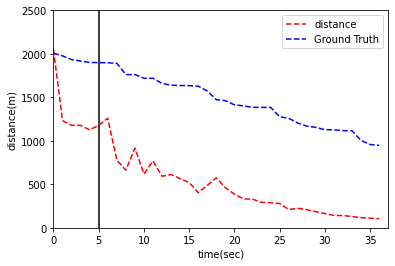

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.vlines(5,0,5000,"black")
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane[:], 'r--',label='distance')
plt.plot( GT[:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, len(air_plane)])   
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./raw_data_11442.png')

In [17]:
air_plane[5]

1177.8769691993027

In [18]:
GT[5]

1899.2146760359917

In [19]:
air_plane_list=[]
for i in air_plane:
    air_plane_list.append(i*1.63)

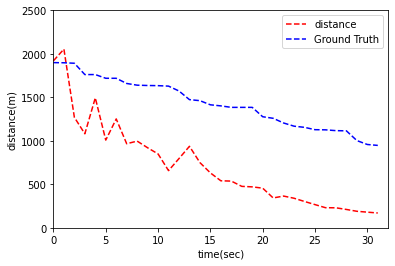

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_list[5:], 'r--',label='distance')
plt.plot( GT[5:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, len(air_plane_list[5:])]) 
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./raw_data_11442_re.png')

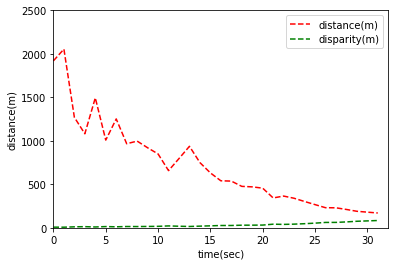

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_list[5:], 'r--',label='distance(m)')
plt.plot( disparity_list[5:], 'g--',label='disparity(m)')
plt.legend()
plt.xlim([0, len(air_plane_list[5:])]) 
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./raw_data_11442_disparity.png')

In [46]:
air_plane_list[5:]

[1919.9394597948633,
 2054.49466067132,
 1270.1001940443489,
 1081.1035224973816,
 1493.9540474221592,
 1008.4802870414427,
 1251.6473944138147,
 966.5524565909972,
 996.728198860055,
 920.2294660786521,
 849.0718638974064,
 657.397418234577,
 796.2182130411527,
 936.9354759933557,
 749.5483807946846,
 631.1564361782614,
 540.4548447510497,
 537.0001974160589,
 476.42763241666484,
 470.69204282209955,
 455.57915096608826,
 343.2566690820365,
 364.844631622703,
 339.6888728048189,
 302.5440861124328,
 266.64243241929427,
 231.12597146702768,
 229.81114422020372,
 210.8902485810308,
 189.9423044154632,
 179.8652165563251,
 170.3124738716645]

# moving average filter

In [23]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array(air_plane_list[5:])

print(moving_average(data,4))

[1581.40945925 1474.91310616 1213.40951275 1208.79631284 1180.15854637
 1055.85208423 1033.78937899  933.14549636  855.85673677  805.72924031
  809.90574279  785.02487202  778.4646265   714.52378443  614.53996479
  546.25977769  506.14367935  484.92475591  436.48887382  408.59312362
  375.84233112  337.58356491  318.43000574  285.0003407   257.53090855
  234.61744917  215.44241717  202.62722844  187.75256086]


In [24]:
mv_airplane = moving_average(data,2)

mv_airplane  = mv_airplane *1.2

In [25]:
len(mv_airplane )

31

In [26]:
mv_GT = moving_average(GT[5:],4)

In [27]:
mv_airplane[:]

array([2384.66047228, 1994.75691283, 1410.72222993, 1545.03454195,
       1501.46060068, 1356.07660887, 1330.9199106 , 1177.96839327,
       1150.17459896, 1061.58079799,  903.88156928,  872.16937877,
       1039.89221342, 1011.89031407,  828.42289018,  702.96676856,
        646.4730253 ,  608.0566979 ,  568.27180514,  555.76271627,
        479.30149203,  424.86078042,  422.72010266,  385.33977535,
        341.51191112,  298.66104233,  276.56226941,  264.42083568,
        240.4995318 ,  221.88451258,  210.10661426])

In [28]:
mv_GT[:]

array([1862.58846679, 1828.23349936, 1783.6446232 , 1740.41101804,
       1714.81771775, 1684.30811071, 1663.58132245, 1642.40037282,
       1634.78811593, 1618.06368184, 1577.42720773, 1534.28742418,
       1480.5552333 , 1437.78115774, 1415.556085  , 1396.28848305,
       1388.94600182, 1357.72285167, 1326.30527075, 1281.37630534,
       1227.28774909, 1196.78997092, 1164.056398  , 1144.39310773,
       1131.57809401, 1121.56181276, 1090.26143485, 1048.15290585,
       1005.73280287])

In [29]:
a = float(mv_airplane[0]/mv_GT[0])
a

1.28029380337873

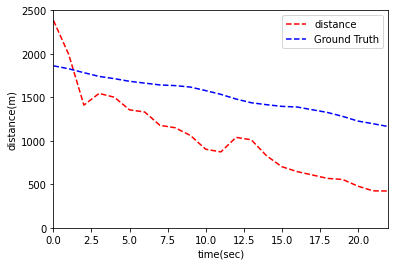

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)
fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.plot(mv_airplane, 'r--',label='distance')
plt.plot(mv_GT, 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, 22])     
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./mv_11442.png')

# low pass filter

In [31]:
import numpy as np

class LowPassFilter:
    def __init__(self, cutoff_freq, ts):
        self.ts = ts
        self.cutoff_freq = cutoff_freq
        self.pre_out = 0.
        self.tau = self.calc_filter_coef() 
        
    def calc_filter_coef(self):
        w_cut = 2*np.pi*self.cutoff_freq
        return 1/w_cut
        
    def filter(self, data):
        out = (self.tau * self.pre_out + self.ts * data) / (self.tau + self.ts)
        self.pre_out = out
        return out

In [32]:
lpf = LowPassFilter(cutoff_freq = 4, ts = 0.1)


In [33]:
air_plane_low = [lpf.filter(data) for data in air_plane_list[:]]
GT_low = [lpf.filter(data) for data in GT[:]]


In [34]:
air_plane_low = air_plane_low*1

In [35]:
air_plane_low_list= []
for i in air_plane_low:
    air_plane_low_list.append(i*1.07)

In [36]:
air_plane_low_list[0]

2557.0183333460977

In [37]:
GT_low[0]

1485.8894865685793

In [38]:
(disparity_list[:5])

[4.272001872658765,
 7.106335201775948,
 7.433034373659253,
 7.433034373659253,
 7.7781745930520225]

In [39]:
(air_plane_low_list[5:])

[2037.1566746662647,
 2152.4396489066,
 1584.8456744051539,
 1278.6229283691919,
 1507.47391597099,
 1201.011448542716,
 1299.9115943345735,
 1109.8387216435135,
 1078.8351156493645,
 1011.4551608737688,
 937.8095513514545,
 770.1320109943194,
 828.6642500243637,
 953.0352934615701,
 845.001892074693,
 723.6298055286785,
 619.6563910461967,
 587.4176133207839,
 531.8766241233101,
 511.6774727771523,
 494.3600679736975,
 403.45472330966294,
 394.1042077612579,
 372.18748200314076,
 337.51708485358176,
 300.16809398086303,
 262.351524413343,
 250.58119112665614,
 232.7481196655629,
 211.63779644971865,
 197.91565022070944,
 186.69779129143498]

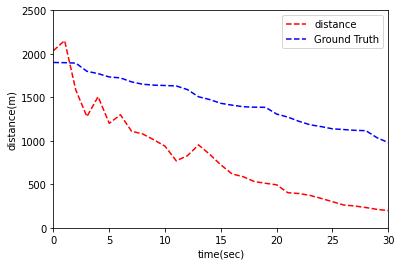

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)
fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_low_list[5:], 'r--',label='distance')
plt.plot( GT_low[5:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, 30])     
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./low_11442.png')


In [41]:
air_plane_low_list[2:]

[2114.291527730829,
 2071.4008717571614,
 1993.9822762328583,
 2037.1566746662647,
 2152.4396489066,
 1584.8456744051539,
 1278.6229283691919,
 1507.47391597099,
 1201.011448542716,
 1299.9115943345735,
 1109.8387216435135,
 1078.8351156493645,
 1011.4551608737688,
 937.8095513514545,
 770.1320109943194,
 828.6642500243637,
 953.0352934615701,
 845.001892074693,
 723.6298055286785,
 619.6563910461967,
 587.4176133207839,
 531.8766241233101,
 511.6774727771523,
 494.3600679736975,
 403.45472330966294,
 394.1042077612579,
 372.18748200314076,
 337.51708485358176,
 300.16809398086303,
 262.351524413343,
 250.58119112665614,
 232.7481196655629,
 211.63779644971865,
 197.91565022070944,
 186.69779129143498]

# RMSE

In [42]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(air_plane_low_list, GT_low)**0.5

print('low',RMSE)

RMSE = mean_squared_error(mv_airplane, mv_GT)**0.5

print('mv',RMSE)

RMSE = mean_squared_error(np.array(air_plane_list[5:]), np.array(GT[5:]))**0.5

print('raw',RMSE)


low 688.394463901816


ValueError: Found input variables with inconsistent numbers of samples: [31, 29]